## 4. 2-D Laplace equation

### 4.1. 개요

  - 2차 편미분 방정식 하나로 특정 상태의 공간에 대한 표현이며, 구체적으로는 어떤 물리 현상의 steady state를 표현.
    - steady state temperature
    - steady state stress
    - steady state potential distribution
    - steady state flow
  - 편미분 방정식은 포괄적으로는 ‘주변 값과의 관계’라는 의미로 생각할 수 있으며, 특히 Laplace 방정식은 ‘주변 값의 평균값’이라는 의미를 가짐
  - 경계 조건이 주어져있을 때 유일한 해를 가짐

  <img src = "images/image17.png">

### 4.2. Model problem
  - https://github.com/vishalk2/Computational-Fluid-Dynamics-CFD/tree/main/FDM/Elliptic/Stream_Function_Examples/Example_1

  - 경계조건을 일부 수정
  
  <img src = "images/image18.png">
  

1. 순차코드

Iteration = 0, Error = 2.275796e+00


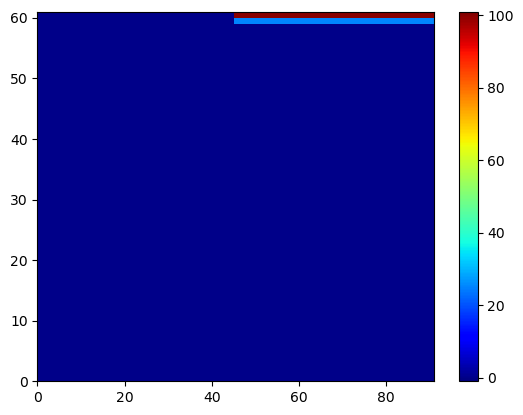

Iteration = 100, Error = 6.103147e-02
Iteration = 200, Error = 3.568502e-02
Iteration = 300, Error = 2.593927e-02
Iteration = 400, Error = 2.062796e-02
Iteration = 500, Error = 1.723567e-02
Iteration = 600, Error = 1.485858e-02
Iteration = 700, Error = 1.308502e-02
Iteration = 800, Error = 1.169729e-02
Iteration = 900, Error = 1.056865e-02
Iteration = 1000, Error = 9.620959e-03


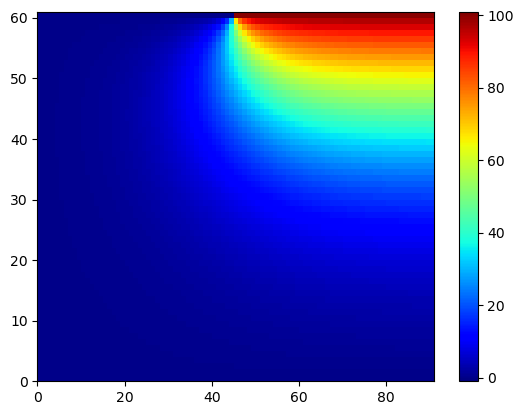

Iteration = 1100, Error = 8.804441e-03
Iteration = 1200, Error = 8.086697e-03
Iteration = 1300, Error = 7.446219e-03
Iteration = 1400, Error = 6.868399e-03
Iteration = 1500, Error = 6.343031e-03
Iteration = 1600, Error = 5.862736e-03
Iteration = 1700, Error = 5.421976e-03
Iteration = 1800, Error = 5.016431e-03
Iteration = 1900, Error = 4.642604e-03
Iteration = 2000, Error = 4.297575e-03


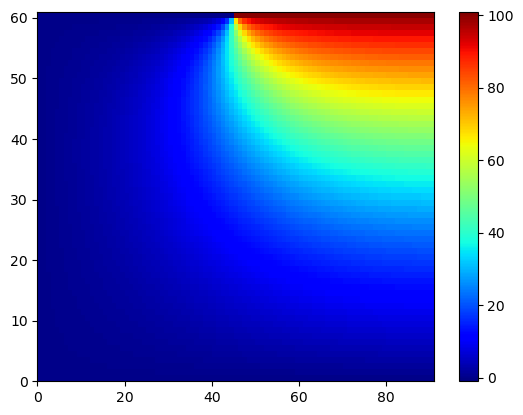

Iteration = 2100, Error = 3.978838e-03
Iteration = 2200, Error = 3.684202e-03
Iteration = 2300, Error = 3.411718e-03
Iteration = 2400, Error = 3.159634e-03
Iteration = 2500, Error = 2.926362e-03
Iteration = 2600, Error = 2.710455e-03
Iteration = 2700, Error = 2.510590e-03
Iteration = 2800, Error = 2.325551e-03
Iteration = 2900, Error = 2.154222e-03
Iteration = 3000, Error = 1.995571e-03


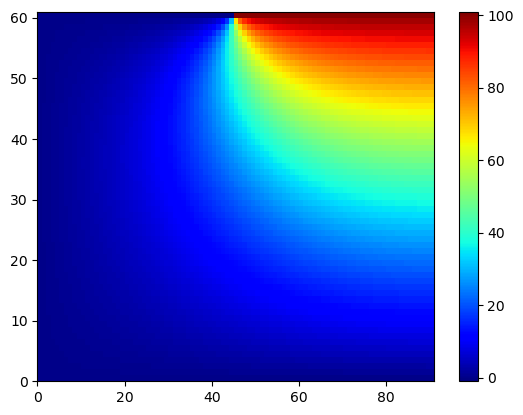

Iteration = 3100, Error = 1.848652e-03
Iteration = 3200, Error = 1.712587e-03
Iteration = 3300, Error = 1.586568e-03
Iteration = 3400, Error = 1.469847e-03
Iteration = 3500, Error = 1.361735e-03
Iteration = 3600, Error = 1.261593e-03
Iteration = 3700, Error = 1.168829e-03
Iteration = 3800, Error = 1.082899e-03
Iteration = 3900, Error = 1.003296e-03
Iteration = 4000, Error = 9.295525e-04


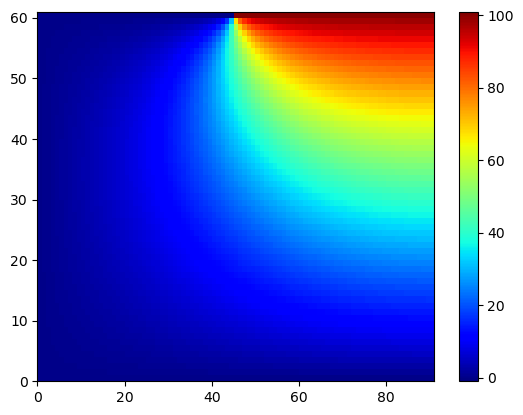

Iteration = 4100, Error = 8.612366e-04


KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
LX = 6.0  # length of domain along x-direction
LY = 4.0  # length of domain along y-direction
EPSILON = 1e-5  # tolerance
MAX_ITER = 100000

M = 90 + 1
N = 60 + 1
dx = LX / (M - 1)
dy = LY / (N - 1)
beta = dx / dy
beta_1 = 1.0 / (2.0 * (1.0 + beta * beta))

def plot(figID, psi, zmin, zmax):
    plt.figure(figID)
    plt.clf()
    plt.pcolormesh(psi, cmap=plt.cm.jet, vmin=zmin, vmax=zmax)
    plt.colorbar()
    plt.draw()
    plt.xlim([0, M])
    plt.ylim([0, N])
    plt.pause(0.1)

def Jacobi_iter(N, M, psi_new, beta, beta_1):

    error = 0.0
    psi_old = np.zeros((N, M))

    for iter in range(0, MAX_ITER):

        psi_old = np.copy(psi_new)

        for i in range(1, N - 1):
            for j in range(1, M - 1):
                psi_new[i][j] = beta_1 * (psi_old[i][j + 1] + psi_old[i][j - 1] +
                                          beta * beta * (psi_old[i + 1][j] + psi_old[i - 1][j]))

        # Right Neumann Boundary Condition
        for i in range(N):
            psi_new[i][M - 1] = psi_new[i][M - 2]

        error = 0.0
        for i in range(N):
            for j in range(M):
                error += (psi_new[i][j] - psi_old[i][j]) * (psi_new[i][j] - psi_old[i][j])
        error = math.sqrt(error / (M * N))

        if iter % 100 == 0:
            print(f"Iteration = {iter}, Error = {error:.6e}")
        if iter % 1000 == 0:
            plot(1, psi_new, -1, 101)

        if error <= EPSILON:
            break

    print(f"Iteration = {iter}, Error = {error:.6e}")

psi_new = np.zeros((N, M))

for i in range(N):
    for j in range(M):
        psi_new[i][j] = 0.0

# Boundary conditions
divide = int((M - 1) * 0.5)
for i in range(divide):
    psi_new[N - 1][i] = 0.0  # upper (left)
for i in range(divide, M):
    psi_new[N - 1][i] = 100.0  # upper (right)
for i in range(N):
    psi_new[i][0] = 0.0  # left wall
for i in range(M):
    psi_new[0][i] = 0.0  # lower wall

# Jacobi iteration
Jacobi_iter(N, M, psi_new, beta, beta_1)


2. 병렬코드
  - Row-wise decomposition

  <img src = "images/image19.png">

  - 계산 영역의 분할
  
  <img src = "images/image20.png">

In [2]:
%%writefile examples/jacobi.py
import numpy as np
import matplotlib.pyplot as plt
import math
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Constants
LX = 6.0  # length of domain along x-direction
LY = 4.0  # length of domain along y-direction
EPSILON = 1e-5  # tolerance
MAX_ITER = 100000

M = 90 + 1
N = 60 + 1
dx = LX / (M - 1)
dy = LY / (N - 1)
beta = dx / dy
beta_1 = 1.0 / (2.0 * (1.0 + beta * beta))

def para_range(n1, n2, size, rank) :
    iwork = divmod((n2 - n1 + 1), size)
    ista = rank * iwork[0] + n1 + min(rank, iwork[1])
    iend = ista + iwork[0] - 1
    if iwork[1] > rank :
        iend = iend + 1
    return ista, iend

def gather_data(psi) :

    ista, iend = para_range(0, N - 1, size, rank)

    istas = comm.gather(ista, root=0)
    iends = comm.gather(iend, root=0)
    
    ##### Gather 대신 send/recv를 이용하는 예
    if rank == 0:
        for i in range(1, size):
            comm.Recv(psi[istas[i]:iends[i]+1,:], source=i, tag=i) #FIX ME
    else:
        comm.Send(psi[ista:iend+1,:], dest=0, tag=rank)  #FIX ME

def plot(figID, psi, zmin, zmax):
    plt.figure(figID)
    plt.clf()
    plt.pcolormesh(psi, cmap=plt.cm.jet, vmin=zmin, vmax=zmax)
    plt.colorbar()
    plt.savefig("examples/jacobi_paralle_sol.png")
    plt.xlim([0, M])
    plt.ylim([0, N])
    plt.pause(0.1)

def Jacobi_iter(N, M, psi_new, beta, beta_1):
    ista, iend = para_range(0, N - 1, size, rank)

    ista_p1 = ista
    iend_m1 = iend
    inext = rank + 1
    iprev = rank - 1

    if rank == 0:
        ista_p1 = ista + 1
        iprev = MPI.PROC_NULL
    elif rank == size - 1:
        iend_m1 = iend - 1
        inext = MPI.PROC_NULL

    error = 0.0
    error_local = 0.0
    psi_old = np.zeros((N, M))

    for iter in range(0, MAX_ITER):

        for i in range(ista, iend + 1):
            for j in range(M):
                psi_old[i][j] = psi_new[i][j]

        # MPI Communication : request 설정
        reqs1 = []
        reqs2 = []

        if inext != MPI.PROC_NULL:
            reqs1.append(comm.Isend(psi_old[iend], inext, tag=1))
            reqs1.append(comm.Irecv(psi_old[iend + 1], inext, tag=2))

        if iprev != MPI.PROC_NULL:
            reqs2.append(comm.Isend(psi_old[ista], iprev, tag=2))
            reqs2.append(comm.Irecv(psi_old[ista - 1], iprev, tag=1))

        if inext != MPI.PROC_NULL:
            for req in reqs1:
                MPI.Request.Wait(req)

        if iprev != MPI.PROC_NULL:
            for req in reqs2:
                MPI.Request.Wait(req)

        ##### MPI Communication : range 설정

        for i in range(ista_p1, iend_m1 + 1): #FIX ME
            for j in range(1, M - 1):
                psi_new[i][j] = beta_1 * (psi_old[i][j + 1] + psi_old[i][j - 1] +
                                          beta * beta * (psi_old[i + 1][j] + psi_old[i - 1][j]))

        # Right Neumann Boundary Condition : range 설정
        for i in range(ista, iend + 1): #FIX ME
            psi_new[i][M - 1] = psi_new[i][M - 2]

        error_local = 0.0
        error = 0.0
        for i in range(ista, iend + 1):
            for j in range(M):
                error_local += (psi_new[i][j] - psi_old[i][j]) * (psi_new[i][j] - psi_old[i][j])
        ##### error reduction
        error = comm.allreduce(error_local, op=MPI.SUM) #FIX ME
        error = math.sqrt(error / (M * N))

        if iter % 10 == 0:
            if rank == 0:
                print(f"Iteration = {iter}, Error = {error:.6e}")

        if error <= EPSILON:
            break

    if rank == 0:
        print(f"Iteration = {iter}, Error = {error:.6e}")

psi_new = np.zeros((N, M))

for i in range(N):
    for j in range(M):
        psi_new[i][j] = 0.0

# Boundary conditions
divide = int((M - 1) * 0.5)

for i in range(divide):
    psi_new[N - 1][i] = 0.0  # upper (left)
for i in range(divide, M):
    psi_new[N - 1][i] = 100.0  # upper (right)
for i in range(N):
    psi_new[i][0] = 0.0  # left wall
for i in range(M):
    psi_new[0][i] = 0.0  # lower wall

# Jacobi iteration
Jacobi_iter(N, M, psi_new, beta, beta_1)

gather_data(psi_new)
if rank == 0:
    plot(1, psi_new, -1, 101)


Writing examples/jacobi.py


In [3]:
!mpirun -np 4 python examples/jacobi.py

Iteration = 0, Error = 2.275796e+00
Iteration = 10, Error = 3.347695e-01
Iteration = 20, Error = 2.040695e-01
Iteration = 30, Error = 1.514653e-01
Iteration = 40, Error = 1.222486e-01
Iteration = 50, Error = 1.033873e-01
Iteration = 60, Error = 9.008629e-02
Iteration = 70, Error = 8.014239e-02
Iteration = 80, Error = 7.239288e-02
Iteration = 90, Error = 6.616271e-02
Iteration = 100, Error = 6.103147e-02
Iteration = 110, Error = 5.672283e-02
Iteration = 120, Error = 5.304724e-02
Iteration = 130, Error = 4.987010e-02
Iteration = 140, Error = 4.709299e-02
Iteration = 150, Error = 4.464221e-02
Iteration = 160, Error = 4.246143e-02
Iteration = 170, Error = 4.050674e-02
Iteration = 180, Error = 3.874346e-02
Iteration = 190, Error = 3.714375e-02
Iteration = 200, Error = 3.568502e-02
Iteration = 210, Error = 3.434874e-02
Iteration = 220, Error = 3.311952e-02
Iteration = 230, Error = 3.198450e-02
Iteration = 240, Error = 3.093286e-02
Iteration = 250, Error = 2.995537e-02
Iteration = 260, Error 

3. 병렬코드 - 영역분할
   - 분할의 두 가지 방식
  
  <img src = "images/image21.png">
  
  - 영역분할 (Domain decomposition)
    - 계산영역만 메모리 할당 : 메모리 절감
    - 인덱스 수정
  

In [4]:
%%writefile examples/jacobi2.py
import numpy as np
import matplotlib.pyplot as plt
import math
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Constants
LX = 6.0  # length of domain along x-direction
LY = 4.0  # length of domain along y-direction
EPSILON = 1e-5  # tolerance
MAX_ITER = 100000

M = 90 + 1
N = 60 + 1
dx = LX / (M - 1)
dy = LY / (N - 1)
beta = dx / dy
beta_1 = 1.0 / (2.0 * (1.0 + beta * beta))

def para_range(n1, n2, size, rank) :
    iwork = divmod((n2 - n1 + 1), size)
    ista = rank * iwork[0] + n1 + min(rank, iwork[1])
    iend = ista + iwork[0] - 1
    if iwork[1] > rank :
        iend = iend + 1
    return ista, iend

def gather_data(psi, psi_all) :

    ista, iend = para_range(0, N - 1, size, rank)
    domain_size = iend - ista + 1
    psi_tmp = np.array(psi[1:domain_size + 1,:])
    cound_send = np.array(comm.allgather(domain_size))
    comm.Gatherv(psi_tmp, recvbuf = (psi_all, cound_send*M), root = 0)

def plot(figID, psi, zmin, zmax):
    plt.figure(figID)
    plt.clf()
    plt.pcolormesh(psi, cmap=plt.cm.jet, vmin=zmin, vmax=zmax)
    plt.colorbar()
    plt.savefig("examples/jacobi2_paralle_sol.png")
    plt.xlim([0, M])
    plt.ylim([0, N])
    plt.pause(0.1)

def Jacobi_iter(N, M, psi_new, beta, beta_1):
    ista, iend = para_range(0, N - 1, size, rank)
    domain_size = iend - ista + 1

    i_s = 1
    i_e = domain_size
    inext = rank + 1
    iprev = rank - 1

    ##### 경계 rank 처리
    if rank == 0:
        i_s = 2 #FIX ME
        iprev = MPI.PROC_NULL #FIX ME
    elif rank == size - 1:
        i_e = domain_size - 1 #FIX ME
        inext = MPI.PROC_NULL #FIX ME

    error = 0.0
    error_local = 0.0
    psi_old = np.zeros((domain_size + 2, M))

    for iter in range(0, MAX_ITER):

        for i in range(1, domain_size + 1):
            for j in range(M):
                psi_old[i][j] = psi_new[i][j]

        # MPI Communication
        reqs1 = []
        reqs2 = []

        if inext != MPI.PROC_NULL:
            reqs1.append(comm.Isend(psi_old[domain_size], inext, tag=1))
            reqs1.append(comm.Irecv(psi_old[domain_size + 1], inext, tag=2))

        if iprev != MPI.PROC_NULL:
            reqs2.append(comm.Isend(psi_old[1], iprev, tag=2))
            reqs2.append(comm.Irecv(psi_old[0], iprev, tag=1))

        if inext != MPI.PROC_NULL:
            for req in reqs1:
                MPI.Request.Wait(req)

        if iprev != MPI.PROC_NULL:
            for req in reqs2:
                MPI.Request.Wait(req)

        # MPI Communication : range 설정

        for i in range(i_s, i_e + 1): #FIX ME
            for j in range(1, M - 1):
                psi_new[i][j] = beta_1 * (psi_old[i][j + 1] + psi_old[i][j - 1] +
                                          beta * beta * (psi_old[i + 1][j] + psi_old[i - 1][j]))

        # Right Neumann Boundary Condition
        for i in range(1, domain_size + 1):
            psi_new[i][M - 1] = psi_new[i][M - 2]

        error_local = 0.0
        error = 0.0
        for i in range(1, domain_size + 1):
            for j in range(M):
                error_local += (psi_new[i][j] - psi_old[i][j]) * (psi_new[i][j] - psi_old[i][j])
        error = comm.allreduce(error_local, op=MPI.SUM)
        error = math.sqrt(error / (M * N))

        psi_all = np.zeros((N, M))

        if iter % 10 == 0:
            if rank == 0:
                print(f"Iteration = {iter}, Error = {error:.6e}")

        if error <= EPSILON:
            gather_data(psi_new, psi_all)
            if rank == 0:
                plot(1, psi_all, -1, 101)
            break

    if rank == 0:
        print(f"Iteration = {iter}, Error = {error:.6e}")

ista, iend = para_range(0, N - 1, size, rank)
domain_size = iend - ista + 1

psi_new = np.zeros((domain_size + 2, M))

for i in range(1, domain_size + 1):
    for j in range(M):
        psi_new[i][j] = 0.0

# Boundary conditions
divide = int((M - 1) * 0.5)

if rank == size - 1:
    for i in range(divide):
        psi_new[domain_size][i] = 0.0  # upper (left)
    for i in range(divide, M):
        psi_new[domain_size][i] = 100.0  # upper (right)
for i in range(1, domain_size + 1):
    psi_new[i][0] = 0.0  # left wall
if rank == 0 :
    for i in range(M):
        psi_new[1][i] = 0.0  # bottom wall

# Jacobi iteration
Jacobi_iter(N, M, psi_new, beta, beta_1)


Writing examples/jacobi2.py


In [5]:
!mpirun -n 4 python examples/jacobi2.py

Iteration = 0, Error = 2.275796e+00
Iteration = 10, Error = 3.347695e-01
Iteration = 20, Error = 2.040695e-01
Iteration = 30, Error = 1.514653e-01
Iteration = 40, Error = 1.222486e-01
Iteration = 50, Error = 1.033873e-01
Iteration = 60, Error = 9.008629e-02
Iteration = 70, Error = 8.014239e-02
Iteration = 80, Error = 7.239288e-02
Iteration = 90, Error = 6.616271e-02
Iteration = 100, Error = 6.103147e-02
Iteration = 110, Error = 5.672283e-02
Iteration = 120, Error = 5.304724e-02
Iteration = 130, Error = 4.987010e-02
Iteration = 140, Error = 4.709299e-02
Iteration = 150, Error = 4.464221e-02
Iteration = 160, Error = 4.246143e-02
Iteration = 170, Error = 4.050674e-02
Iteration = 180, Error = 3.874346e-02
Iteration = 190, Error = 3.714375e-02
Iteration = 200, Error = 3.568502e-02
Iteration = 210, Error = 3.434874e-02
Iteration = 220, Error = 3.311952e-02
Iteration = 230, Error = 3.198450e-02
Iteration = 240, Error = 3.093286e-02
Iteration = 250, Error = 2.995537e-02
Iteration = 260, Error 